In [3]:
from bs4 import BeautifulSoup
import pandas as pd

In [25]:
from urllib.request import urlopen

url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.naver?sel=cur&date=20170804'

page = urlopen(url_base + url_sub)
soup = BeautifulSoup(page, 'html.parser')
# soup

In [27]:
soup.find_all('div', 'tit5')[0].a.string
soup.find_all('td', 'point')[0].string

In [32]:
movie_name = [soup.find_all('div', 'tit5')[i].a.string for i in range(49)]
movie_point = [soup.find_all('td', 'point')[i].string for i in range(49)]
# movie_point

In [51]:
date = pd.date_range('2017-05-01', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [52]:
import urllib
import tqdm

movie_date = []
movie_name = []
movie_point = []
for today in tqdm.tqdm(date):
    url = url_base + 'movie/sdb/rank/rmovie.naver?sel=cur&date={date}'.format(date=urllib.parse.quote(today.strftime('%Y%m%d')))


    response = urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))

    soup.find_all('div', 'tit5')[0].a.string
    soup.find_all('td', 'point')[0].string
    
    movie_date.extend([today for i in range(end)])
    movie_name.extend([soup.find_all('div', 'tit5')[i].a.string for i in range(end)])
    movie_point.extend([soup.find_all('td', 'point')[i].string for i in range(end)])

    

100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


In [53]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [54]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [59]:
movie.info()
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [62]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
# print (movie_unique)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [63]:
tmp = movie.query('name == ["노무현입니다"]')
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path='C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


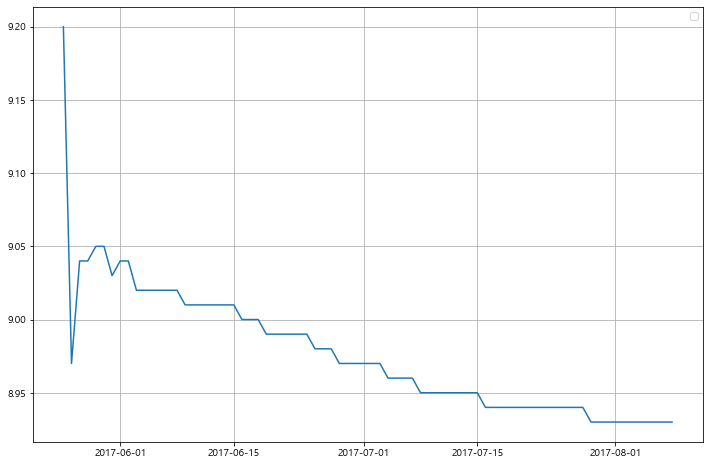

In [65]:
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [75]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()
movie_pivot.columns

MultiIndex([('point',                '10분'),
            ('point',              '47 미터'),
            ('point',           '500일의 썸머'),
            ('point',       '7년-그들이 없는 언론'),
            ('point',        '7번째 내가 죽던 날'),
            ('point',           '7인의 사무라이'),
            ('point',               '8 마일'),
            ('point',        '가디언즈 오브 갤럭시'),
            ('point', '가디언즈 오브 갤럭시 VOL. 2'),
            ('point',               '겟 아웃'),
            ...
            ('point',         '하울의 움직이는 성'),
            ('point',        '하이큐!! 끝과 시작'),
            ('point',                '한공주'),
            ('point',      '해리가 샐리를 만났을 때'),
            ('point',              '핵소 고지'),
            ('point',             '행복 목욕탕'),
            ('point',                '헤드윅'),
            ('point',              '환상의 빛'),
            ('point',  '흑집사 : 북 오브 더 아틀란틱'),
            ('point',             '히든 피겨스')],
           names=[None, 'name'], length=204)

In [71]:
movie_pivot.to_csv('../output/movie_pivot.csv', sep=',', encoding='ANSI')

In [76]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()
movie_pivot.columns

Index(['10분', '47 미터', '500일의 썸머', '7년-그들이 없는 언론', '7번째 내가 죽던 날', '7인의 사무라이',
       '8 마일', '가디언즈 오브 갤럭시', '가디언즈 오브 갤럭시 VOL. 2', '겟 아웃',
       ...
       '하울의 움직이는 성', '하이큐!! 끝과 시작', '한공주', '해리가 샐리를 만났을 때', '핵소 고지', '행복 목욕탕',
       '헤드윅', '환상의 빛', '흑집사 : 북 오브 더 아틀란틱', '히든 피겨스'],
      dtype='object', name='name', length=204)

In [77]:
movie_pivot.to_csv('../output/movie_pivot1.csv', sep=',', encoding='cp949')

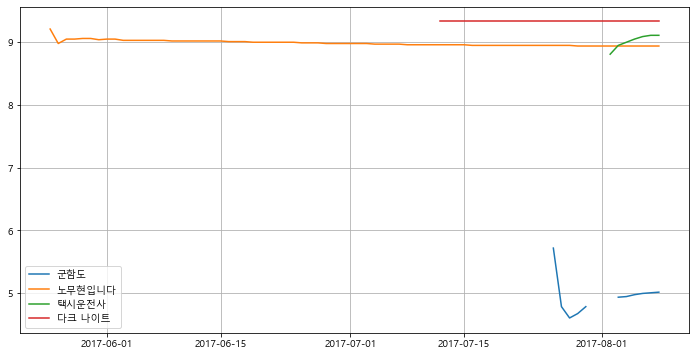

In [78]:
target_col = ['군함도', '노무현입니다', '택시운전사', '다크 나이트']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()